<a href="https://colab.research.google.com/github/ayesha-119/Deep-Learning-BWF/blob/master/Task_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🔴 Task 20**

**Topics: Introduction to Keras, Example Projects on Classification and Regression**

Resource: https://drive.google.com/file/d/1i9dPxM_1M4HYN5bYxFcuklC1vM0GrOCq/view?usp=share_link


# **Classifying movie reviews:**

**Loading the IMDB dataset**

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding one of the review**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

**Encoding the integer sequences into a binary matrix**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
#vectorizing labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

**The model definition**

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

**Compiling the model**

In [ ]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

In [ ]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

**Plotting the training and validation loss**

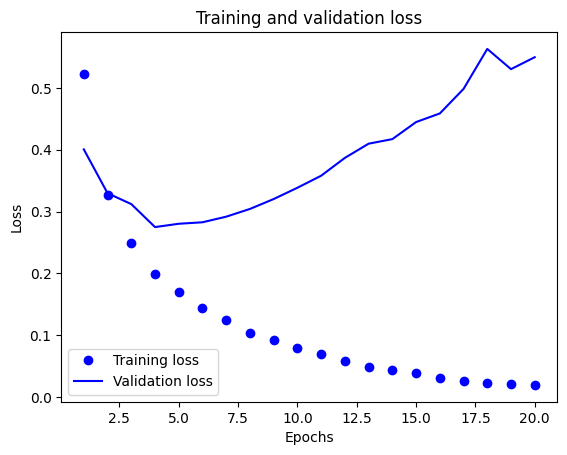

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Plotting the training and validation accuracy**

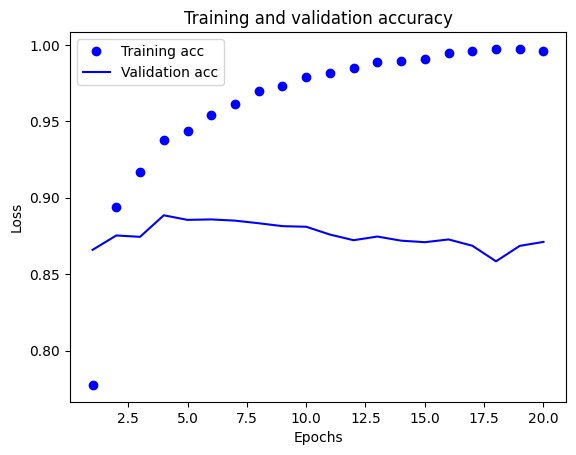

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 31ms/step - loss: 0.4896 - accuracy: 0.8089
Epoch 2/4
49/49 [==============================] - 2s 48ms/step - loss: 0.2900 - accuracy: 0.9006
Epoch 3/4
49/49 [==============================] - 2s 36ms/step - loss: 0.2236 - accuracy: 0.9202
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2962 - accuracy: 0.8804


**Using a trained network to generate predictions on new data**

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.18240239],
       [0.9997249 ],
       [0.6884543 ],
       ...,
       [0.08997952],
       [0.06301654],
       [0.3723397 ]], dtype=float32)

# **Further experiments**

 The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:

 You used two hidden layers. Try using one or three hidden layers, and see how
doing so affects validation and test accuracy.

 Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

 Try using the mse loss function instead of binary_crossentropy.

 Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# define the model
model = models.Sequential()
#using 3 hidden layers
model.add(layers.Dense(16,  activation= 'relu', input_shape=(10000,)))
model.add(layers.Dense(16,  activation= 'relu'))
model.add(layers.Dense(16,  activation= 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

#compile the model
model.compile(optimizer= 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

# training your model 
history = model.fit(partial_x_train, partial_y_train, epochs= 4, batch_size = 512)
history_dict = history.history 

model.evaluate(x_test, y_test)

model.predict(x_test)


Epoch 1/4
30/30 [==============================] - 2s 33ms/step - loss: 0.5476 - accuracy: 0.7399
Epoch 2/4
30/30 [==============================] - 1s 34ms/step - loss: 0.3271 - accuracy: 0.8895
Epoch 3/4
30/30 [==============================] - 1s 32ms/step - loss: 0.2390 - accuracy: 0.9166
Epoch 4/4
782/782 [==============================] - 2s 2ms/step


array([[0.32279876],
       [0.9957844 ],
       [0.85154045],
       ...,
       [0.0964826 ],
       [0.16969603],
       [0.7484687 ]], dtype=float32)

# **Classifying newswires: a multiclass classification example**

**Loading the Reuters dataset**

In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

**Decoding newswires back to text**

In [ ]:
word_index= reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[10]

3

**Preparing the data : Encoding the data**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))
  for i, sequence in  enumerate(sequences):
    result[i, sequence] = 1
  return result
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

**Model definition**

In [ ]:
from keras.layers.core.dense import Dense
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

**Compiling the model**

In [ ]:
model.compile(optimizer = "rmsprop",
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 70ms/step - loss: 0.1271 - accuracy: 0.9573 - val_loss: 1.0015 - val_accuracy: 0.8090
Epoch 2/20
16/16 [==============================] - 1s 78ms/step - loss: 0.1248 - accuracy: 0.9579 - val_loss: 0.9834 - val_accuracy: 0.8020
Epoch 3/20
16/16 [==============================] - 2s 101ms/step - loss: 0.1174 - accuracy: 0.9589 - val_loss: 1.0075 - val_accuracy: 0.8140
Epoch 4/20
16/16 [==============================] - 1s 81ms/step - loss: 0.1152 - accuracy: 0.9580 - val_loss: 1.0093 - val_accuracy: 0.8110
Epoch 5/20
16/16 [==============================] - 1s 61ms/step - loss: 0.1146 - accuracy: 0.9580 - val_loss: 1.0146 - val_accuracy: 0.8090
Epoch 6/20
16/16 [==============================] - 1s 60ms/step - loss: 0.1128 - accuracy: 0.9579 - val_loss: 1.0065 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 1s 57ms/step - loss: 0.1115 - accuracy: 0.9579 - val_loss: 1.0164 - val_accuracy: 0.8050
Epoch 8/20
1

**Plotting the training and validation loss**

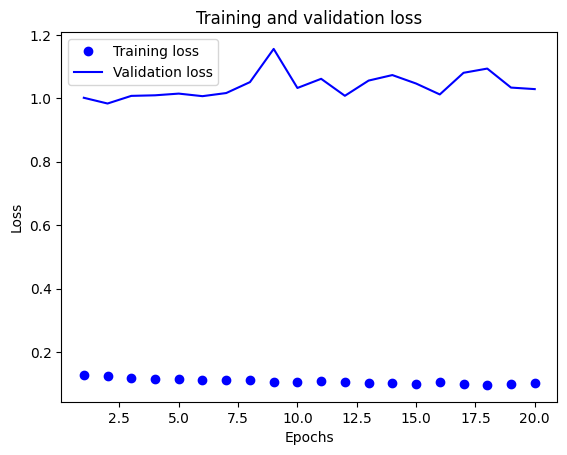

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

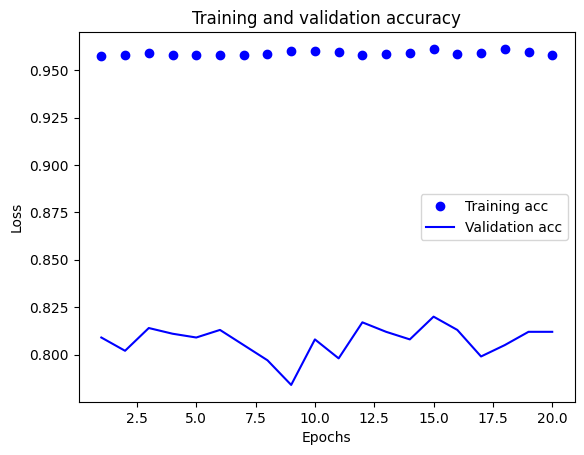

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 76ms/step - loss: 2.6451 - accuracy: 0.5040 - val_loss: 1.7562 - val_accuracy: 0.6220
Epoch 2/9
16/16 [==============================] - 1s 63ms/step - loss: 1.4939 - accuracy: 0.6807 - val_loss: 1.3643 - val_accuracy: 0.6930
Epoch 3/9
16/16 [==============================] - 1s 61ms/step - loss: 1.1561 - accuracy: 0.7477 - val_loss: 1.1883 - val_accuracy: 0.7360
Epoch 4/9
16/16 [==============================] - 1s 58ms/step - loss: 0.9615 - accuracy: 0.7894 - val_loss: 1.0856 - val_accuracy: 0.7680
Epoch 5/9
16/16 [==============================] - 1s 56ms/step - loss: 0.8044 - accuracy: 0.8252 - val_loss: 1.0383 - val_accuracy: 0.7690
Epoch 6/9
16/16 [==============================] - 1s 55ms/step - loss: 0.6778 - accuracy: 0.8500 - val_loss: 0.9682 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 1s 56ms/step - loss: 0.5658 - accuracy: 0.8780 - val_loss: 0.9588 - val_accuracy: 0.7920
Epoch 8/9
16/16 [===

**Generating predictions for new data**

In [ ]:
predictions = model.predict(x_test)

#Each entry in predictions is a vector of length 46
print(predictions[0].shape)
# The coefficients in this vector sum to 1:
print(np.sum(predictions[0]))

71/71 [==============================] - 1s 10ms/step
(46,)
0.99999994


**A model with an information bottleneck**

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 25ms/step - loss: 2.5268 - accuracy: 0.5381 - val_loss: 1.7984 - val_accuracy: 0.5870
Epoch 2/20
63/63 [==============================] - 2s 33ms/step - loss: 1.6097 - accuracy: 0.5920 - val_loss: 1.5788 - val_accuracy: 0.5830
Epoch 3/20
63/63 [==============================] - 2s 26ms/step - loss: 1.3830 - accuracy: 0.6119 - val_loss: 1.4624 - val_accuracy: 0.6080
Epoch 4/20
63/63 [==============================] - 1s 21ms/step - loss: 1.2375 - accuracy: 0.6387 - val_loss: 1.4029 - val_accuracy: 0.6280
Epoch 5/20
63/63 [==============================] - 1s 20ms/step - loss: 1.1192 - accuracy: 0.6733 - val_loss: 1.3571 - val_accuracy: 0.6530
Epoch 6/20
63/63 [==============================] - 1s 20ms/step - loss: 1.0143 - accuracy: 0.7323 - val_loss: 1.3052 - val_accuracy: 0.7020
Epoch 7/20
63/63 [==============================] - 1s 20ms/step - loss: 0.9224 - accuracy: 0.7714 - val_loss: 1.2931 - val_accuracy: 0.7100
Epoch 8/20
63

# **Predicting house prices: a regression example**

**Loading the Boston housing dataset**

In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


**Preparing the data: Normalizing the data**

In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

**Building your network: model defination**

In [4]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',
  input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

**Validating your approach using K-fold validation**


In [6]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100

all_scores = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
      train_data[(i + 1) * num_val_samples:]],
      axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
      train_targets[(i + 1) * num_val_samples:]],
      axis=0)
  model = build_model()

  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=1, verbose=0)
  

  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [8]:
print(all_scores)
print(np.mean(all_scores))
#Running this with num_epochs = 100 yields the following results:

[2.2484688758850098, 2.452547073364258, 2.4615559577941895, 2.6099464893341064]
2.443129599094391


**Saving the validation logs at each fold**

In [12]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)

  #Prepares the validation data: data from partition #k
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  # Prepares the training data: data from all other partitions
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
      axis=0)
  
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
      train_targets[(i + 1) * num_val_samples:]],
      axis=0)
  
  # Builds the Keras model (already compiled)
  model = build_model()

  # Trains the model (in silent mode, verbose=0)
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data=(val_data, val_targets),
                      epochs=num_epochs, batch_size=1, verbose=0)
  print(history.history.keys())
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 0
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold # 1
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold # 2
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold # 3
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


**Building the history of successive mean K-fold validation scores**

In [13]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

** Plotting validation scores**

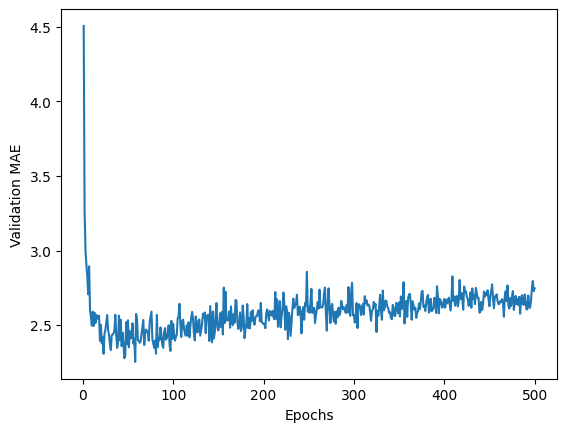

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

**Plotting validation scores, excluding the first 10 data points**

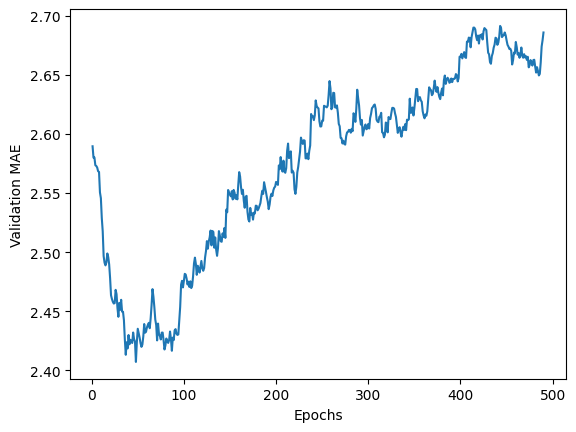

In [15]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

**Training the final model**

In [16]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 18.2363 - mae: 2.6947


In [17]:
test_mae_score

2.694711685180664